# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
pd.set_option("display.max_columns",80)
data=pd.DataFrame(pd.read_excel("C:\\Users\\somy\\Downloads\\stack-overflow-developer-survey-2020\\candyhierarchy2017.xlsx"))

C:\Users\somy\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [2]:
data.duplicated()
data.info()
data.describe()
data.shape
data.columns
data.isna().sum().tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


[0,
 110,
 41,
 84,
 64,
 100,
 747,
 734,
 672,
 958,
 992,
 1006,
 765,
 688,
 706,
 682,
 683,
 678,
 691,
 752,
 680,
 743,
 946,
 711,
 853,
 704,
 692,
 729,
 702,
 823,
 731,
 697,
 879,
 734,
 716,
 697,
 695,
 694,
 712,
 673,
 672,
 678,
 713,
 694,
 695,
 1026,
 698,
 942,
 744,
 945,
 674,
 736,
 730,
 686,
 685,
 718,
 691,
 725,
 1024,
 729,
 693,
 688,
 675,
 671,
 727,
 729,
 764,
 813,
 942,
 724,
 776,
 811,
 740,
 744,
 723,
 698,
 817,
 710,
 709,
 722,
 753,
 679,
 691,
 1014,
 714,
 776,
 706,
 725,
 901,
 690,
 738,
 882,
 693,
 708,
 715,
 1002,
 917,
 714,
 736,
 708,
 706,
 708,
 690,
 792,
 789,
 823,
 757,
 747,
 705,
 1549,
 1743,
 2074,
 744,
 2451,
 725,
 2375,
 1098,
 2361,
 2393,
 855]

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [3]:
data.drop(columns=["Q5: STATE, PROVINCE, COUNTY, ETC","Internal ID","Q12: MEDIA [Daily Dish]","Q12: MEDIA [Science]","Q8: DESPAIR OTHER","Q7: JOY OTHER","Q12: MEDIA [ESPN]","Q9: OTHER COMMENTS","Q12: MEDIA [Yahoo]","Click Coordinates (x, y)","Unnamed: 113"],inplace=True)

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [4]:
data.fillna(value={"Q1: GOING OUT?":"Yes"},limit=17,inplace=True)
data["Q1: GOING OUT?"].fillna("No",inplace=True )

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [5]:
data["Q2: GENDER"]=data["Q2: GENDER"].fillna("I'd rather not say")

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [63]:
data['Q3: AGE']=data['Q3: AGE'].replace(["I can remember when Java was a cool new language","your mom","old enough","MY NAME JEFF","old","ancient","OLD","ancient","46 Halloweens.","sixty-nine","See question 2","Enough","older than dirt","hahahahaha","no","Many","Old enough",""], np.NaN)
data["Q3: AGE"]=data["Q3: AGE"].replace(["59 on the day after Halloween",70.5,1000,"60+",100,"Over 50","5u","24-50",102,39.4,99,312,"45-55","?"],[59,70,np.nan,60,np.nan,np.nan,np.nan,np.nan,np.nan,39,np.nan,np.nan,50,np.nan,])
data["Q3: AGE"]=data["Q3: AGE"].replace([1.,4.,6.,8.,7.],42)
from random import choice
mask = data["Q3: AGE"].isna()
data.loc[mask,["Q3: AGE"]] = data.loc[mask,["Q3: AGE"]].applymap(lambda _: choice([42,43,37,40,34]))
data["Q3: AGE"].()
#Very few of the missing data have been replaced by AVG and Usa in Age and Country,respectively. 
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].replace("Unknown","Usa")
data["Q3: AGE"]=data["Q3: AGE"].replace("Unknown",42)

array(['Unknown', 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36,
       45, 25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46,
       42, 62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19, 57,
       60, 66, 12, 55, 72, 21, 11, 9, 68, 20, 10, 71, 90, 13, 88, 74, 17,
       15, 75, 14, 76, 77, 73], dtype=object)

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [22]:
data["Q4: COUNTRY"].unique()
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].replace(["USA ","USA","us","usa","Us","US","United States","united states","Usa","United States ","United staes","United States of America","United states","u.s.a.","USAUSAUSA","america","UD","United States of America ","US of A","U.S.A.","united states of america","Unites States","The United States","Unied States","U S","u.s","The United States of America","unite states","U.S.","SA? Hard to tell anymore..","usas","United State","United Sates","USa","I pretend to be from Canada, but I am really from the United States.","Usa ","United Stated","United ststes","USA! USA! USA!","USAA","united States","N. America","Ahem....Amerca","USSA","U.S. ","u s a","United Statea","united ststes","USA USA USA!!!!","u.s.","unhinged states","USA? Hard to tell anymore..","America","United Statss","united States "],"USA")
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].replace(["canada","canada ","Canada ","Canada`","CANADA"],"Canada")
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].replace(["uk","United Kingdom","England","UK","U.K. ","Uk","UK ","United kingdom"],"UK")
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].replace([ 35,"Earth", 46,"insanity lately", 45, 32,1,"A","subscribe to dm4uz3 on youtube", "I don't know anymore","Fear and Loathing"],np.nan)
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].replace(["soviet canuckistan","Murica","Atlantis","The Netherlands","murrika","hong kong","france","Europe","'merica","Canae","Can","Trumpistan","Narnia","germany","Ireland"],["Russia","Murcia(Spain)",np.nan,"Netherlands","Murcia(Spain)","Hong Kong","France",np.nan,"Murcia(Spain)","Canada","Canada","USA",np.nan,"Germany","Ireland"])
data.fillna(value={"Q4: COUNTRY":"Canada"},limit=8,inplace=True)
data.fillna(value={"Q4: COUNTRY":"USA"},limit=67,inplace=True)
data["Q4: COUNTRY"]=data["Q4: COUNTRY"].str.title()

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [74]:
for columns in data:
    data[columns].fillna("Unknown",inplace=True)

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [75]:
data["Q10: DRESS"].fillna("Unknown",inplace=True)

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [76]:
data["Q11: DAY"].fillna("Unknown",inplace=True)

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

### 14 - write a summary about all the cleaning steps 

In [77]:
for columnData in data.iloc[:,6:107]:
    columnData1=data[columnData]
    print('Column Name : ', columnData)
    x=columnData1.value_counts()["JOY"]
    print('Column Contents : ',x)

Column Name :  Q6 | Any full-sized candy bar
Column Contents :  1559
Column Name :  Q6 | Black Jacks
Column Contents :  92
Column Name :  Q6 | Bonkers (the candy)
Column Contents :  116
Column Name :  Q6 | Bonkers (the board game)
Column Contents :  193
Column Name :  Q6 | Bottle Caps
Column Contents :  465
Column Name :  Q6 | Box'o'Raisins
Column Contents :  117
Column Name :  Q6 | Broken glow stick
Column Contents :  24
Column Name :  Q6 | Butterfinger
Column Contents :  1177
Column Name :  Q6 | Cadbury Creme Eggs
Column Contents :  820
Column Name :  Q6 | Candy Corn
Column Contents :  478
Column Name :  Q6 | Candy that is clearly just the stuff given out for free at restaurants
Column Contents :  39
Column Name :  Q6 | Caramellos
Column Contents :  953
Column Name :  Q6 | Cash, or other forms of legal tender
Column Contents :  1439
Column Name :  Q6 | Chardonnay
Column Contents :  1040
Column Name :  Q6 | Chick-o-Sticks (we don’t know what that is)
Column Contents :  299
Column Name

In [78]:
for columnData in data.iloc[:,6:107]:
    columnData1=data[columnData]
    print('Column Name : ', columnData)
    x=columnData1.value_counts()["DESPAIR"]
    print('Column Contents : ',x)

Column Name :  Q6 | Any full-sized candy bar
Column Contents :  17
Column Name :  Q6 | Black Jacks
Column Contents :  793
Column Name :  Q6 | Bonkers (the candy)
Column Contents :  495
Column Name :  Q6 | Bonkers (the board game)
Column Contents :  546
Column Name :  Q6 | Bottle Caps
Column Contents :  560
Column Name :  Q6 | Box'o'Raisins
Column Contents :  1179
Column Name :  Q6 | Broken glow stick
Column Contents :  1625
Column Name :  Q6 | Butterfinger
Column Contents :  141
Column Name :  Q6 | Cadbury Creme Eggs
Column Contents :  395
Column Name :  Q6 | Candy Corn
Column Contents :  743
Column Name :  Q6 | Candy that is clearly just the stuff given out for free at restaurants
Column Contents :  1325
Column Name :  Q6 | Caramellos
Column Contents :  163
Column Name :  Q6 | Cash, or other forms of legal tender
Column Contents :  65
Column Name :  Q6 | Chardonnay
Column Contents :  317
Column Name :  Q6 | Chick-o-Sticks (we don’t know what that is)
Column Contents :  644
Column Name

In [79]:
C=[1599,1177,1439,1040,1176,1069,1105,1020,1447,1227,1026,1185,1122,1291,1018,1001,1188,1498,1151,1399,1058,1320]
D=[1089,1179,1325,1406,1433,1176,1462,1061,1435,1085,1076,1480,1151,1140,1252,1146,1455,1289]

In [80]:
data_ = pd.DataFrame(list(zip(C, D)),
               columns =['JOY', 'DESPAIR'])

In [81]:
data_["JOY"].sort_values(ascending=False)
data_["DESPAIR"].sort_values(ascending=False)

11    1480
6     1462
16    1455
8     1435
4     1433
3     1406
2     1325
17    1289
14    1252
1     1179
5     1176
12    1151
15    1146
13    1140
0     1089
9     1085
10    1076
7     1061
Name: DESPAIR, dtype: int64

In [82]:
DESPAIR=data.loc[:,["Q6 | Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards","Q6 | White Bread","Q6 | Kale smoothie","Q6 | Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]]

In [83]:
JOY=data.loc[:,["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]]

In [84]:
relation1=data["Q2: GENDER"]
relation2=data["Q3: AGE"]
relation3=data["Q1: GOING OUT?"]
relation4=data["Q4: COUNTRY"]
relation5=data["Q11: DAY"]
JOY["Gender"]=relation1
JOY["Age"]=relation2
JOY["Going Out"]=relation3
JOY["COUNTRY"]=relation4
JOY["Day"]=relation5
relation1=data["Q2: GENDER"]
relation2=data["Q3: AGE"]
relation3=data["Q1: GOING OUT?"]
relation4=data["Q4: COUNTRY"]
relation5=data["Q11: DAY"]
DESPAIR["Gender"]=relation1
DESPAIR["Age"]=relation2
DESPAIR["Going Out"]=relation3
DESPAIR["Country"]=relation4
DESPAIR["Day"]=relation5

<AxesSubplot:xlabel='Q6 | Cash, or other forms of legal tender', ylabel='Count'>

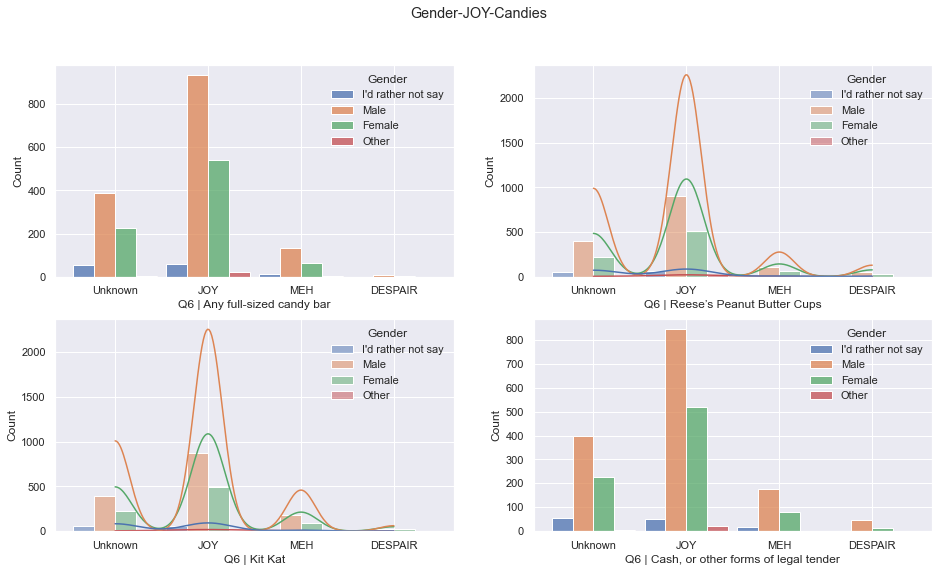

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Gender-JOY-Candies')
sns.histplot(data=JOY, x="Q6 | Any full-sized candy bar", color="skyblue",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 0])
sns.histplot(data=JOY, x="Q6 | Reese’s Peanut Butter Cups", kde=True, color="olive",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 1])
sns.histplot(data=JOY, x="Q6 | Kit Kat", kde=True, color="gold",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 0])
sns.histplot(data=JOY, x="Q6 | Cash, or other forms of legal tender", color="teal",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 1])

<AxesSubplot:xlabel='Q6 | Nestle Crunch', ylabel='Count'>

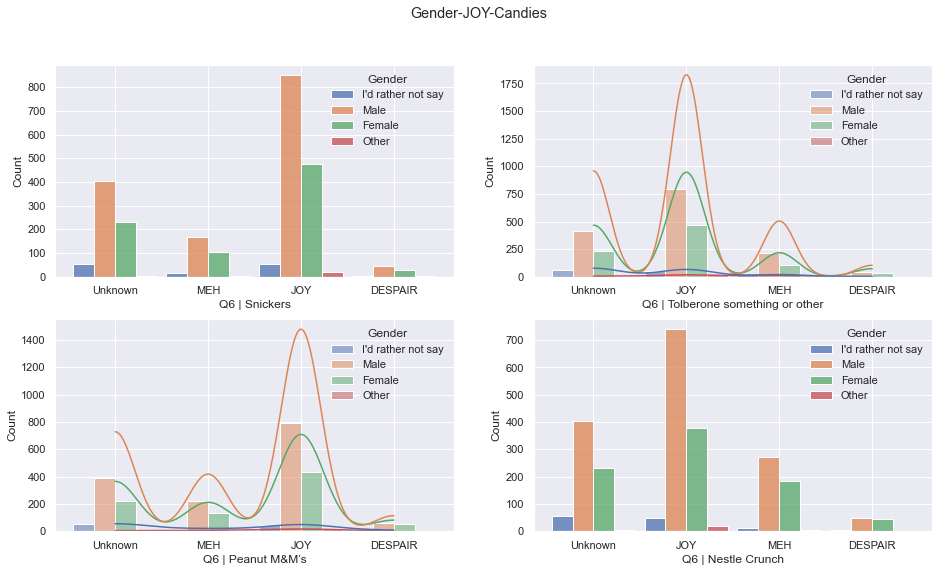

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Gender-JOY-Candies')
sns.histplot(data=JOY, x="Q6 | Snickers", color="skyblue",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 0])
sns.histplot(data=JOY, x="Q6 | Tolberone something or other", kde=True, color="olive",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 1])
sns.histplot(data=JOY, x="Q6 | Peanut M&M’s", kde=True, color="gold",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 0])
sns.histplot(data=JOY, x="Q6 | Nestle Crunch", color="teal",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 1])


<AxesSubplot:xlabel='Q6 | Butterfinger', ylabel='Count'>

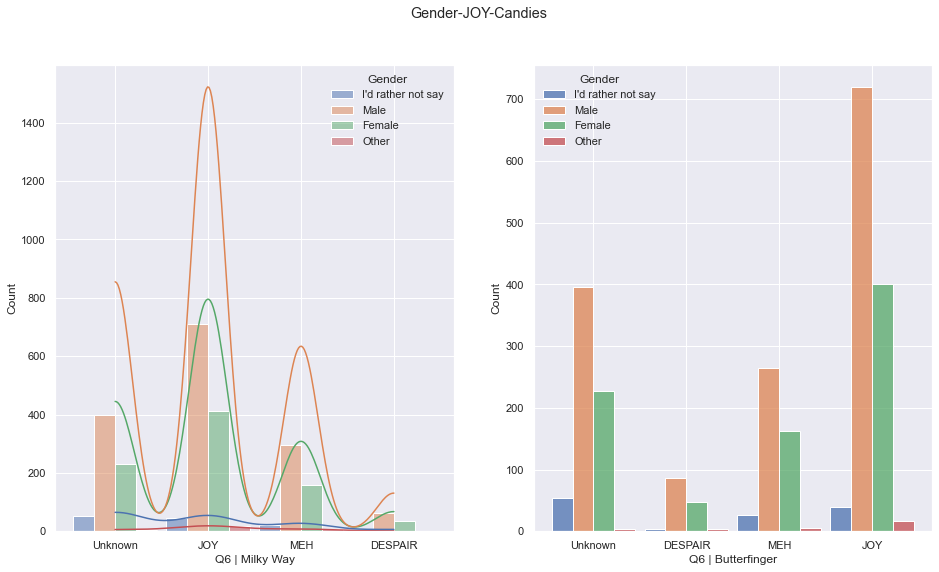

In [87]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Gender-JOY-Candies')
sns.histplot(data=JOY, x="Q6 | Milky Way", kde=True, color="gold",hue="Gender", multiple="dodge", shrink=.9,ax=axs[0])
sns.histplot(data=JOY, x="Q6 | Butterfinger", color="teal",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1])

<AxesSubplot:xlabel='Q6 | Kale smoothie', ylabel='Count'>

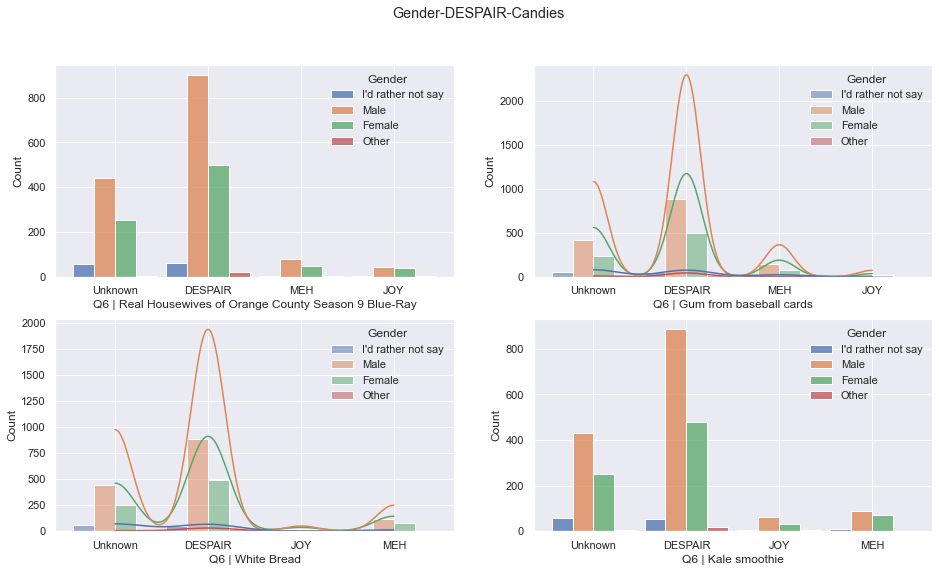

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Gender-DESPAIR-Candies')
sns.histplot(data=DESPAIR, x="Q6 | Real Housewives of Orange County Season 9 Blue-Ray", color="skyblue",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 0])
sns.histplot(data=DESPAIR, x="Q6 | Gum from baseball cards", kde=True, color="olive",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 1])
sns.histplot(data=DESPAIR, x="Q6 | White Bread", kde=True, color="gold",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 0])
sns.histplot(data=DESPAIR, x="Q6 | Kale smoothie", color="teal",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 1])

<AxesSubplot:xlabel='Q6 | Those odd marshmallow circus peanut things', ylabel='Count'>

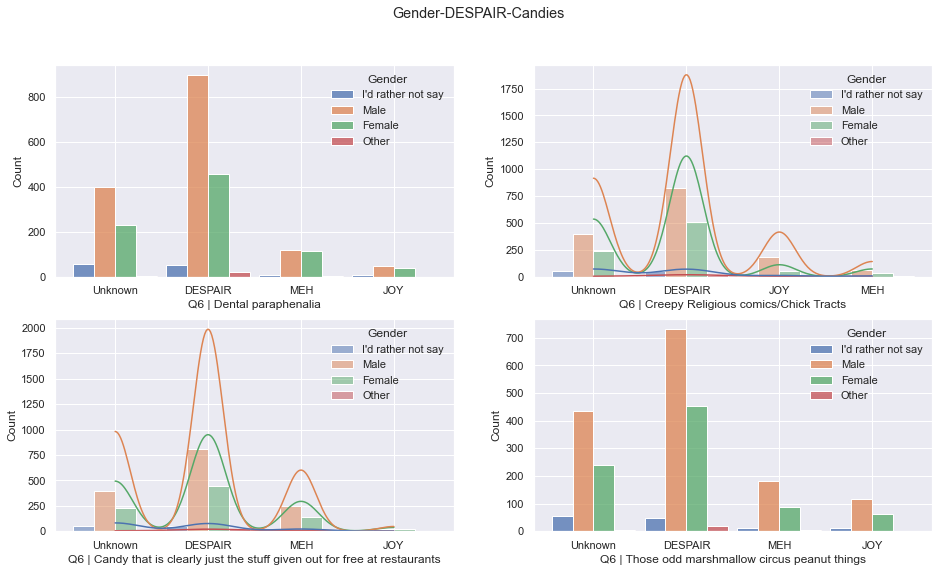

In [89]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Gender-DESPAIR-Candies')
sns.histplot(data=DESPAIR, x="Q6 | Dental paraphenalia",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 0])
sns.histplot(data=DESPAIR, x="Q6 | Creepy Religious comics/Chick Tracts", kde=True, color="olive",hue="Gender", multiple="dodge", shrink=.9, ax=axs[0, 1])
sns.histplot(data=DESPAIR, x="Q6 | Candy that is clearly just the stuff given out for free at restaurants", kde=True, color="gold",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 0])
sns.histplot(data=DESPAIR, x="Q6 | Those odd marshmallow circus peanut things", color="teal",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1, 1])

<AxesSubplot:xlabel="Q6 | Box'o'Raisins", ylabel='Count'>

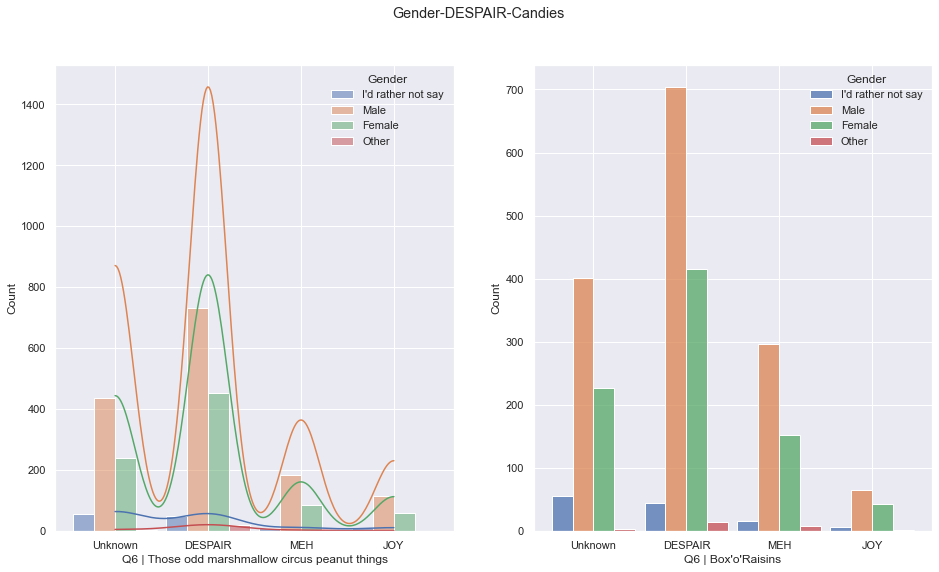

In [90]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Gender-DESPAIR-Candies')
sns.histplot(data=DESPAIR, x="Q6 | Those odd marshmallow circus peanut things", kde=True, color="gold",hue="Gender", multiple="dodge", shrink=.9,ax=axs[0])
sns.histplot(data=DESPAIR, x="Q6 | Box'o'Raisins", color="teal",hue="Gender", multiple="dodge", shrink=.9, ax=axs[1])

In [91]:
main=JOY.groupby("Gender")
secmain=main.get_group("Male")
Final=secmain[["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain=pd.DataFrame(Final)
JOY_Male = seccmain.rename(columns={0: 'JOY_Male'}, index={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})

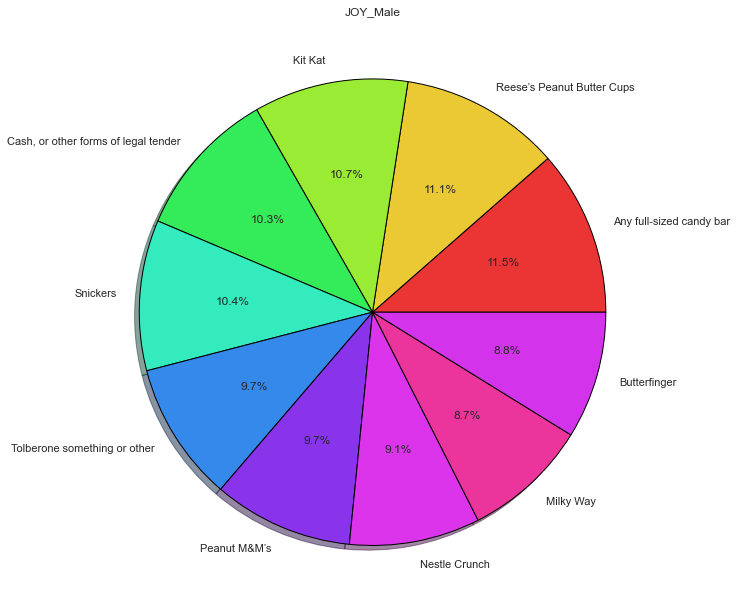

In [92]:
plt.figure(figsize = (10, 10))
color_S=["#eb3434","#ebc934","#99eb34","#34eb59","#34ebbd","#3489eb","#8934eb","#dc34eb","#eb349c","#d334eb"]
data_labels=["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
data_x=[936,907,874,844,852,790,792,740,711,720]
plt.pie(data_x,labels=data_labels,colors=color_S, wedgeprops={'edgecolor':'black'}, 
        shadow=True, autopct='%1.1f%%')  
plt.title("JOY_Male")
plt.show()

Text(0.5, 1.0, 'JOY_Male')

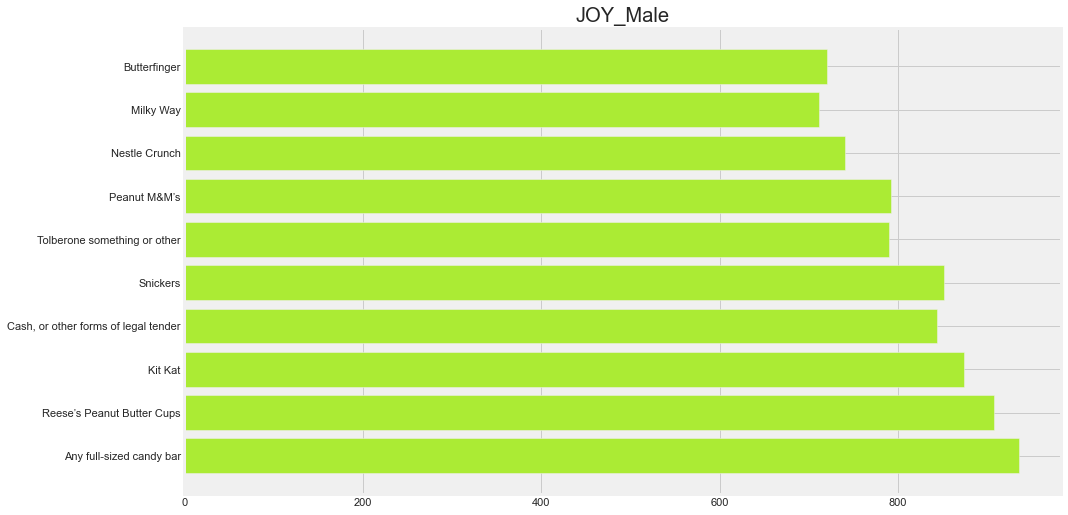

In [93]:
plt.figure(figsize = (14, 8))
plt.style.use('fivethirtyeight')
x_=["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
y_=[936,907,874,844,852,790,792,740,711,720]
plt.barh(x_,y_,color='#abeb34') 
plt.title('JOY_Male')

In [94]:
main=JOY.groupby("Gender")
secmain_female=main.get_group("Female")
Final_female=secmain[["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain_female=pd.DataFrame(Final_female)
JOY_Male = seccmain.rename(columns={0: 'JOY_Male'}, index={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})

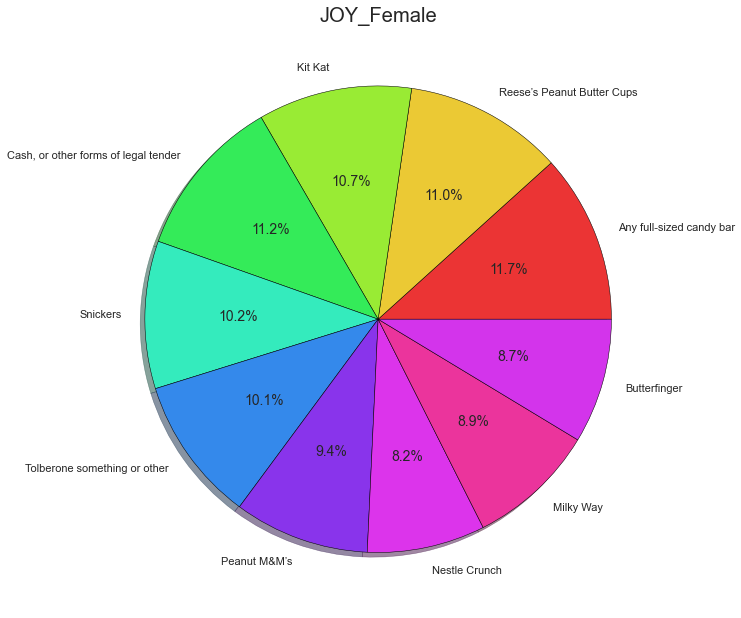

In [95]:
plt.style.use("seaborn-white")
plt.figure(figsize = (10, 10))
color_S=["#eb3434","#ebc934","#99eb34","#34eb59","#34ebbd","#3489eb","#8934eb","#dc34eb","#eb349c","#d334eb"]
data_labels=["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
data_x=[542,510,494,520,474,466,435,379,413,401]
plt.pie(data_x,labels=data_labels,colors=color_S, wedgeprops={'edgecolor':'black'}, 
        shadow=True, autopct='%1.1f%%')  
plt.title("JOY_Female")
plt.show()

<BarContainer object of 10 artists>

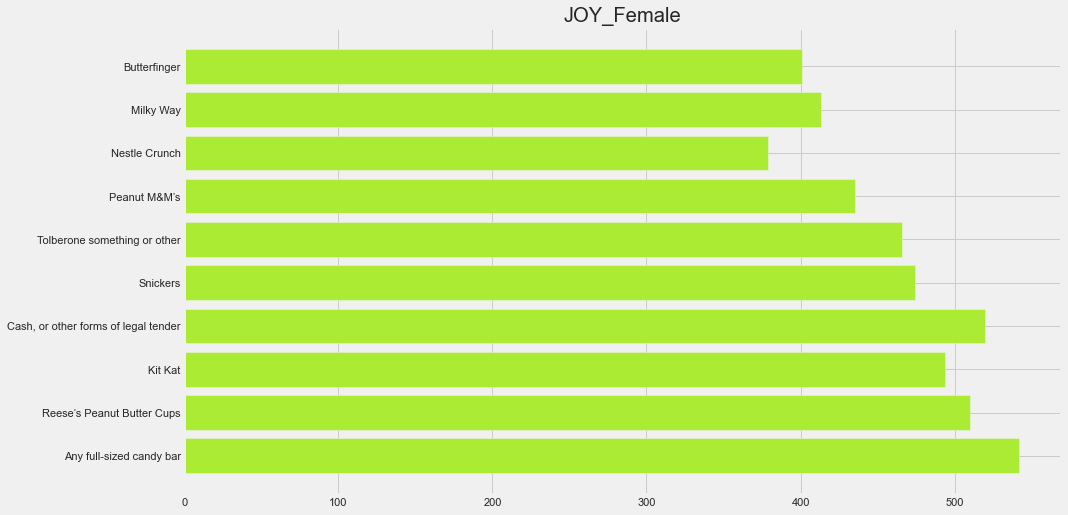

In [96]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14,8))
x_=["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
y_=[542,510,494,520,474,466,435,379,413,401]
plt.title("JOY_Female")
plt.barh(x_,y_,color="#abeb34") 

In [97]:
main_=DESPAIR.groupby("Gender")
secmain_=main_.get_group("Female")
Final_=secmain_[["Q6 | Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards","Q6 | White Bread","Q6 | Kale smoothie","Q6 | Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]].apply(lambda x:x.str.contains("DESPAIR").sum())
#["Q6 | Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards","Q6 | White Bread","Q6 | Kale smoothie","Q6 | Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
seccmain_=pd.DataFrame(Final_)
DESPAIR_Female=seccmain_.rename(columns={0:"DESPAIR_Female"},index={"Q6 | Real Housewives of Orange County Season 9 Blue-Ray":"Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards":"Gum from baseball cards","Q6 | White Bread":"White Bread","Q6 | Kale smoothie":"Kale smoothie","Q6 | Dental paraphenalia":"Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts":"Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants":"Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything":"Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things":"Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins":"Q6 | Box'o'Raisins"})

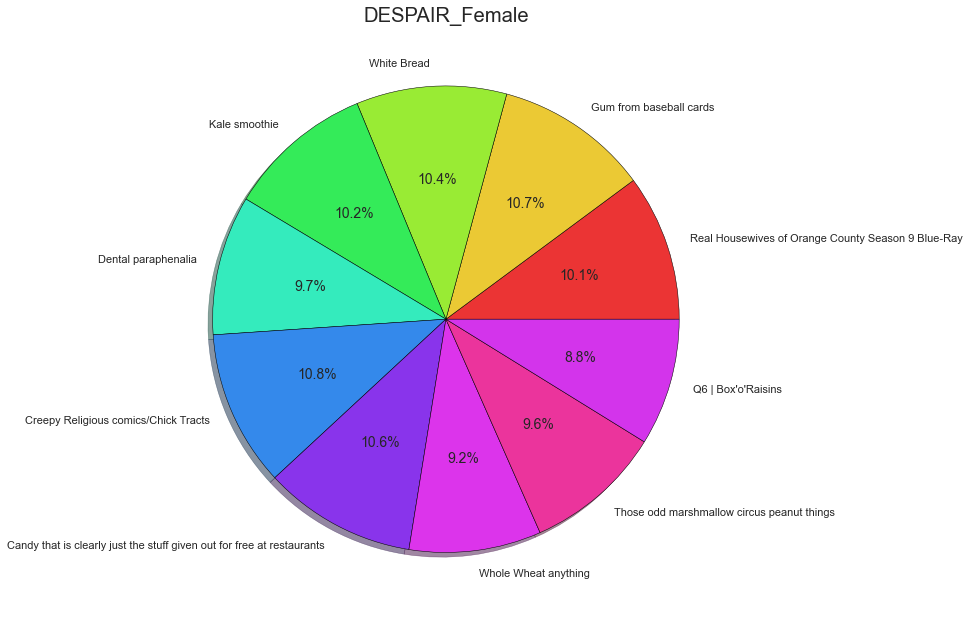

In [98]:
plt.style.use('seaborn-white')
plt.figure(figsize = (10, 10))
color_S=["#eb3434","#ebc934","#99eb34","#34eb59","#34ebbd","#3489eb","#8934eb","#dc34eb","#eb349c","#d334eb"]
data_labels=["Real Housewives of Orange County Season 9 Blue-Ray","Gum from baseball cards","White Bread","Kale smoothie","Dental paraphenalia","Creepy Religious comics/Chick Tracts","Candy that is clearly just the stuff given out for free at restaurants","Whole Wheat anything","Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
data_x=[479,503,492,480,457,511,499,432,452,416]
plt.pie(data_x,labels=data_labels,colors=color_S, wedgeprops={'edgecolor':'black'}, 
        shadow=True, autopct='%1.1f%%')  
plt.title("DESPAIR_Female")
plt.show()

Text(0.5, 1.0, 'DESPAIR_Female')

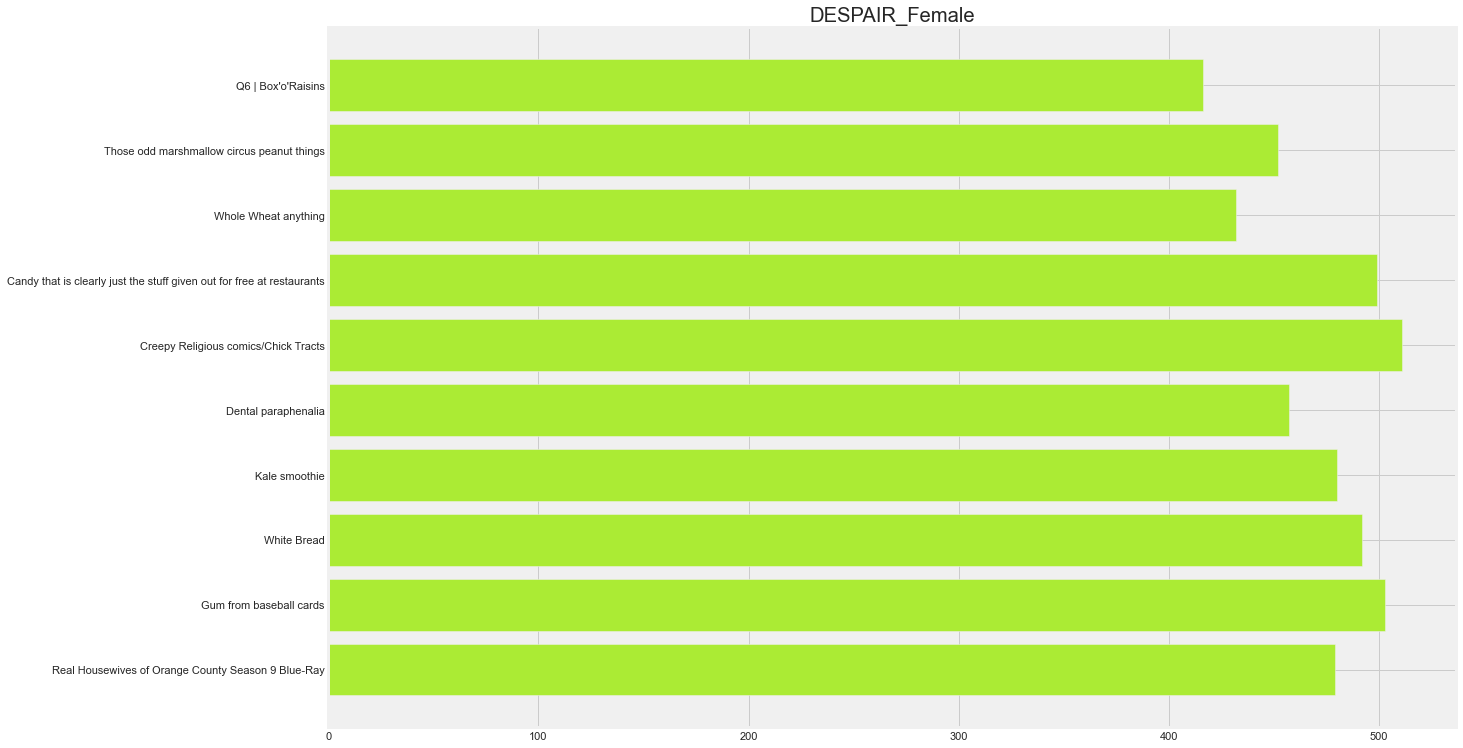

In [99]:
plt.figure(figsize = (18, 12))
plt.style.use('fivethirtyeight')
x_=["Real Housewives of Orange County Season 9 Blue-Ray","Gum from baseball cards","White Bread","Kale smoothie","Dental paraphenalia","Creepy Religious comics/Chick Tracts","Candy that is clearly just the stuff given out for free at restaurants","Whole Wheat anything","Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
y_=[479,503,492,480,457,511,499,432,452,416]
plt.barh(x_,y_,color='#abeb34') 
plt.title('DESPAIR_Female')


In [100]:
main_=DESPAIR.groupby("Gender")
secmain_=main_.get_group("Male")
Final_=secmain_[["Q6 | Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards","Q6 | White Bread","Q6 | Kale smoothie","Q6 | Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]].apply(lambda x:x.str.contains("DESPAIR").sum())
seccmain_=pd.DataFrame(Final_)
seccmain_

,0
Q6 | Real Housewives of Orange County Season 9 Blue-Ray,902
Q6 | Gum from baseball cards,883
Q6 | White Bread,885
Q6 | Kale smoothie,886
Q6 | Dental paraphenalia,900
Q6 | Creepy Religious comics/Chick Tracts,822
Q6 | Candy that is clearly just the stuff given out for free at restaurants,806
Q6 | Whole Wheat anything,802
Q6 | Those odd marshmallow circus peanut things,731
Q6 | Box'o'Raisins,704


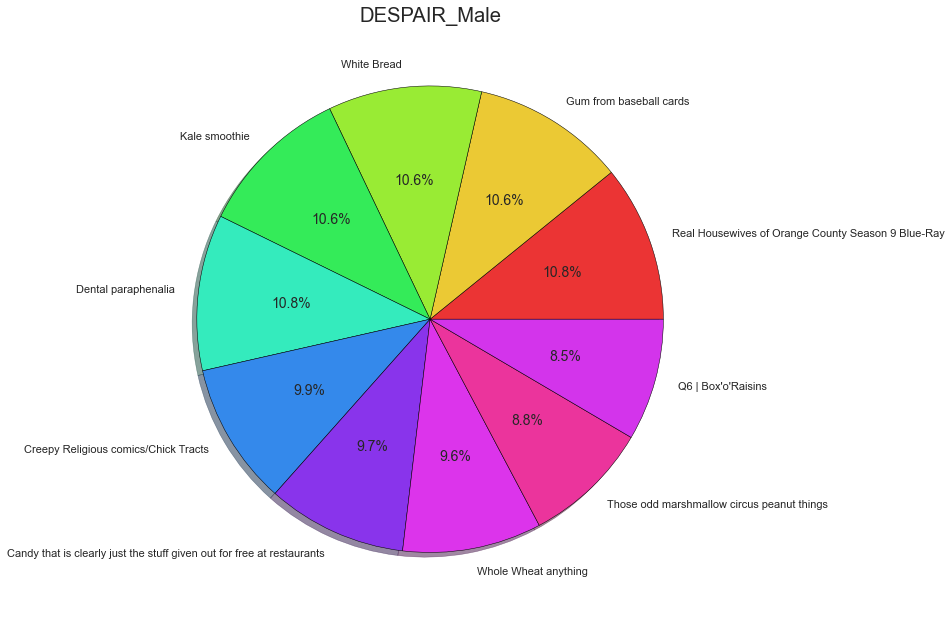

In [101]:
plt.style.use('seaborn-white')
plt.figure(figsize = (10, 10))
color_S=["#eb3434","#ebc934","#99eb34","#34eb59","#34ebbd","#3489eb","#8934eb","#dc34eb","#eb349c","#d334eb"]
data_labels=["Real Housewives of Orange County Season 9 Blue-Ray","Gum from baseball cards","White Bread","Kale smoothie","Dental paraphenalia","Creepy Religious comics/Chick Tracts","Candy that is clearly just the stuff given out for free at restaurants","Whole Wheat anything","Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
data_x=[902,883,885,886,900,822,806,802,731,704]
plt.pie(data_x,labels=data_labels,colors=color_S, wedgeprops={'edgecolor':'black'}, 
        shadow=True, autopct='%1.1f%%')  
plt.title("DESPAIR_Male")
plt.show()

Text(0.5, 1.0, 'DESPAIR_Male')

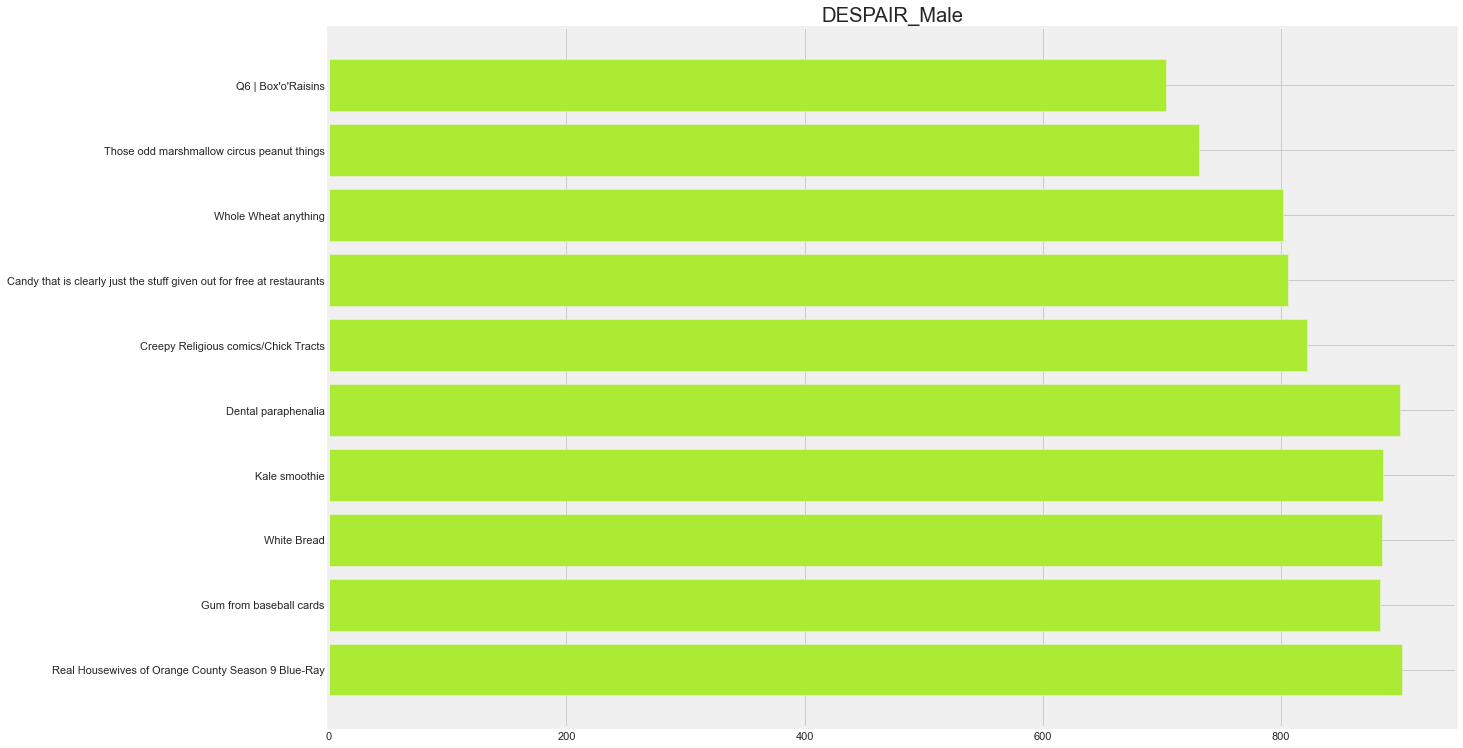

In [102]:
plt.figure(figsize = (18, 12))
plt.style.use('fivethirtyeight')
x_=["Real Housewives of Orange County Season 9 Blue-Ray","Gum from baseball cards","White Bread","Kale smoothie","Dental paraphenalia","Creepy Religious comics/Chick Tracts","Candy that is clearly just the stuff given out for free at restaurants","Whole Wheat anything","Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
y_=[902,883,885,886,900,822,806,802,731,704]
plt.barh(x_,y_,color='#abeb34') 
plt.title('DESPAIR_Male')

In [103]:
plt.figure(figsize = (18, 12))
age=JOY.groupby("Age")
a=age["Q6 | Any full-sized candy bar"].apply(lambda x:x.str.contains("JOY").sum())
b=age["Q6 | Reese’s Peanut Butter Cups"].apply(lambda x:x.str.contains("JOY").sum())
c=age["Q6 | Kit Kat"].apply(lambda x:x.str.contains("JOY").sum())
d=age["Q6 | Cash, or other forms of legal tender"].apply(lambda x:x.str.contains("JOY").sum())
e=age["Q6 | Snickers"].apply(lambda x:x.str.contains("JOY").sum())
f=age["Q6 | Tolberone something or other"].apply(lambda x:x.str.contains("JOY").sum())
g=age["Q6 | Peanut M&M’s"].apply(lambda x:x.str.contains("JOY").sum())
h=age["Q6 | Nestle Crunch"].apply(lambda x:x.str.contains("JOY").sum())
i=age["Q6 | Milky Way"].apply(lambda x:x.str.contains("JOY").sum())
g=age["Q6 | Butterfinger"].apply(lambda x:x.str.contains("JOY").sum())
frames = [a,b,c,d,e,f,g,h,i,g]
result = pd.concat(frames,axis=1)

Result=result.rename(columns={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})
Result

,Any full-sized candy bar,Reese’s Peanut Butter Cups,Kit Kat,"Cash, or other forms of legal tender",Snickers,Tolberone something or other,Butterfinger,Nestle Crunch,Milky Way,Butterfinger
Age,,,,,,,,,,
9,3,3,3,3,3,3,3,2,3,3
10,2,1,2,3,1,2,1,2,0,1
11,4,4,5,4,4,4,2,5,3,2
12,8,7,7,7,7,7,6,7,9,6
13,5,5,4,5,2,4,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...
75,1,2,3,2,2,0,2,3,1,2
76,1,2,2,1,2,2,1,2,2,1
77,1,0,1,1,1,1,1,0,0,1


<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, 'JOY_Age')

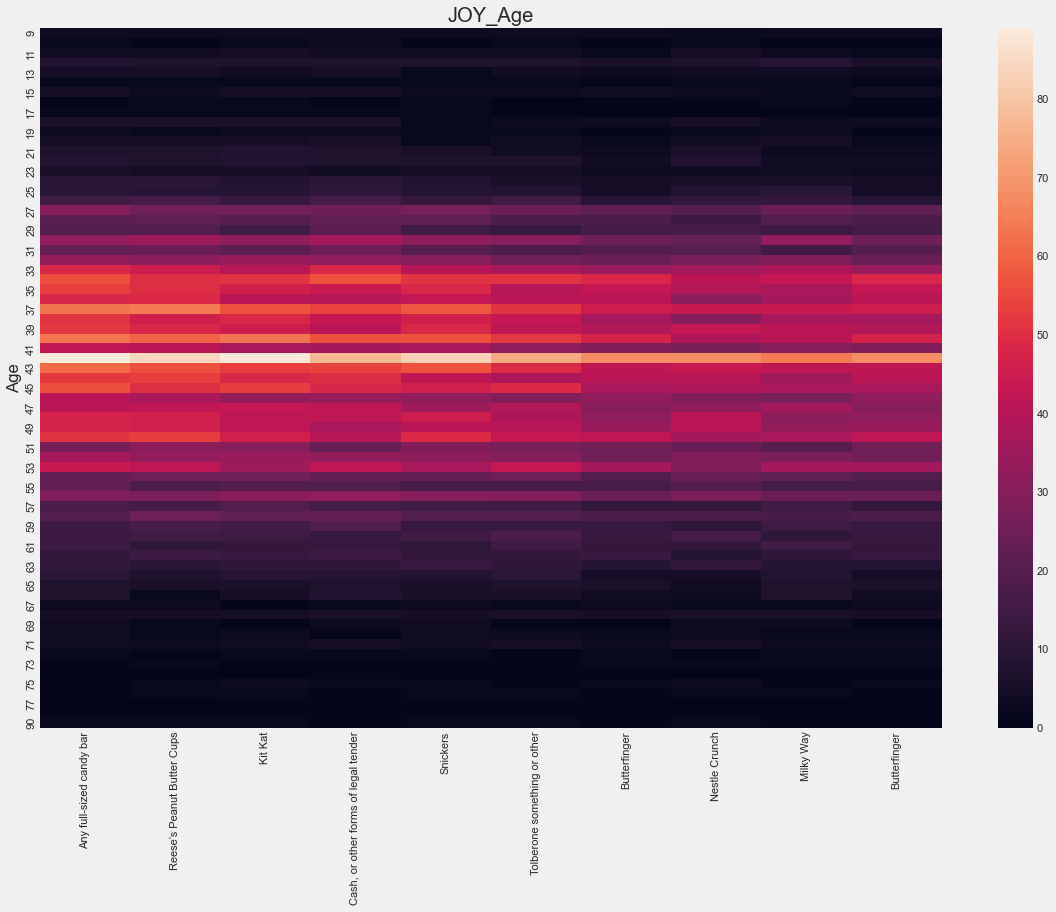

In [104]:
plt.figure(figsize = (18, 12))
sns.heatmap(Result)
plt.title("JOY_Age")

In [108]:
plt.figure(figsize = (18, 12))
age=DESPAIR.groupby("Age")
a_=age["Q6 | Real Housewives of Orange County Season 9 Blue-Ray"].apply(lambda x:x.str.contains("DESPAIR").sum())
b_=age["Q6 | Gum from baseball cards"].apply(lambda x:x.str.contains("DESPAIR").sum())
c_=age["Q6 | White Bread"].apply(lambda x:x.str.contains("DESPAIR").sum())
d_=age["Q6 | Kale smoothie"].apply(lambda x:x.str.contains("DESPAIR").sum())
e_=age["Q6 | Dental paraphenalia"].apply(lambda x:x.str.contains("DESPAIR").sum())
f_=age["Q6 | Creepy Religious comics/Chick Tracts"].apply(lambda x:x.str.contains("DESPAIR").sum())
g_=age["Q6 | Candy that is clearly just the stuff given out for free at restaurants"].apply(lambda x:x.str.contains("DESPAIR").sum())
h_=age["Q6 | Whole Wheat anything"].apply(lambda x:x.str.contains("DESPAIR").sum())
i_=age["Q6 | Those odd marshmallow circus peanut things"].apply(lambda x:x.str.contains("DESPAIR").sum())
g_=age["Q6 | Box'o'Raisins"].apply(lambda x:x.str.contains("DESPAIR").sum())
frames_ = [a_,b_,c_,d_,e_,f_,g_,h_,i_,g_]
result_ = pd.concat(frames_,axis=1)
result_
Result_=result_.rename(columns={"Q6 | Real Housewives of Orange County Season 9 Blue-Ray":"Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards":"Gum from baseball cards","Q6 | White Bread":"White Bread","Q6 | Kale smoothie":"Kale smoothie","Q6 | Dental paraphenalia":"Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts":"Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants":"Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything":"Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things":"Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins":"Q6 | Box'o'Raisins"})

<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, 'DESPAIR_Age')

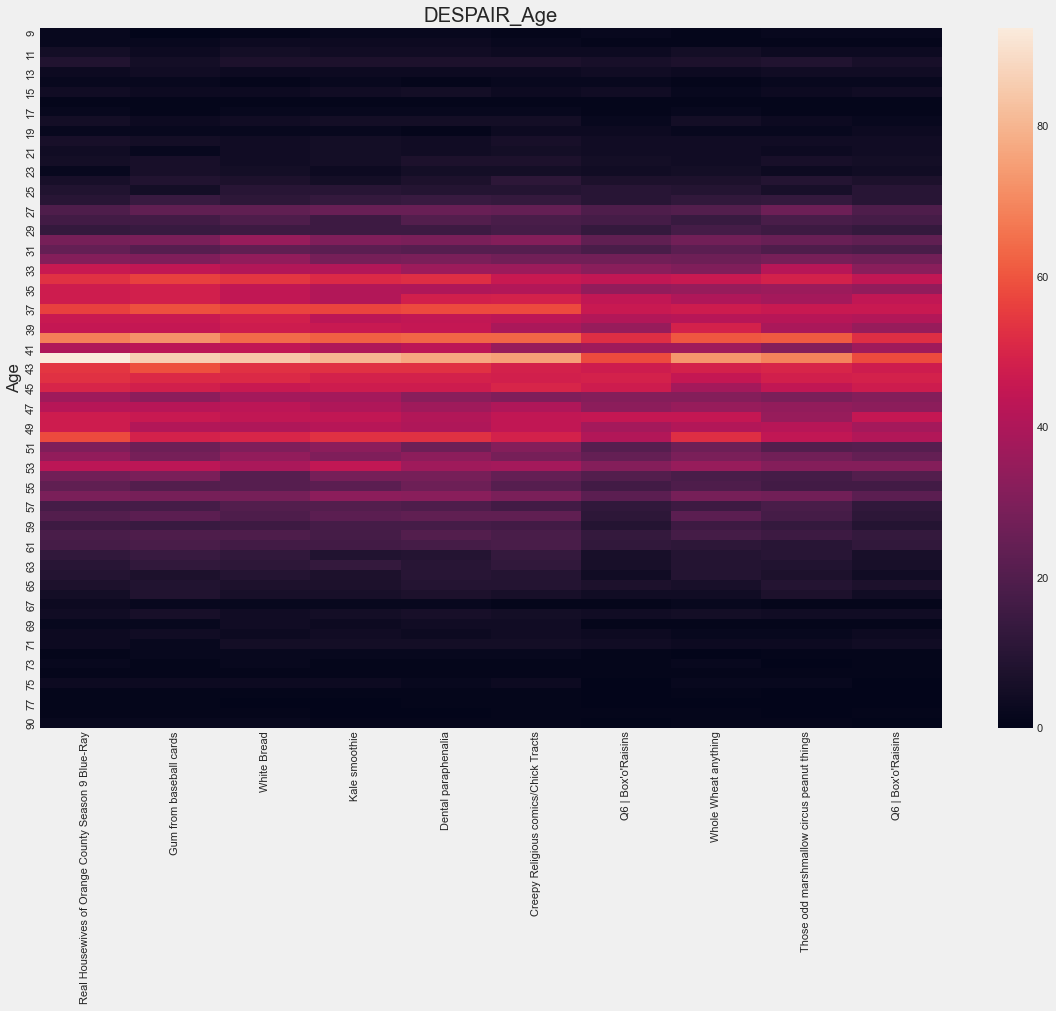

In [109]:
plt.figure(figsize = (18, 12))
sns.heatmap(Result_)
plt.title("DESPAIR_Age")

In [110]:
plt.figure(figsize = (18, 12))
co=JOY.groupby("COUNTRY")
a=co["Q6 | Any full-sized candy bar"].apply(lambda x:x.str.contains("JOY").sum())
b=co["Q6 | Reese’s Peanut Butter Cups"].apply(lambda x:x.str.contains("JOY").sum())
c=co["Q6 | Kit Kat"].apply(lambda x:x.str.contains("JOY").sum())
d=co["Q6 | Cash, or other forms of legal tender"].apply(lambda x:x.str.contains("JOY").sum())
e=co["Q6 | Snickers"].apply(lambda x:x.str.contains("JOY").sum())
f=co["Q6 | Tolberone something or other"].apply(lambda x:x.str.contains("JOY").sum())
g=co["Q6 | Peanut M&M’s"].apply(lambda x:x.str.contains("JOY").sum())
h=co["Q6 | Nestle Crunch"].apply(lambda x:x.str.contains("JOY").sum())
i=co["Q6 | Milky Way"].apply(lambda x:x.str.contains("JOY").sum())
g=co["Q6 | Butterfinger"].apply(lambda x:x.str.contains("JOY").sum())
frames = [a,b,c,d,e,f,g,h,i,g]
result = pd.concat(frames,axis=1)
result
Result_1=result.rename(columns={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})

<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, 'JOY_Country')

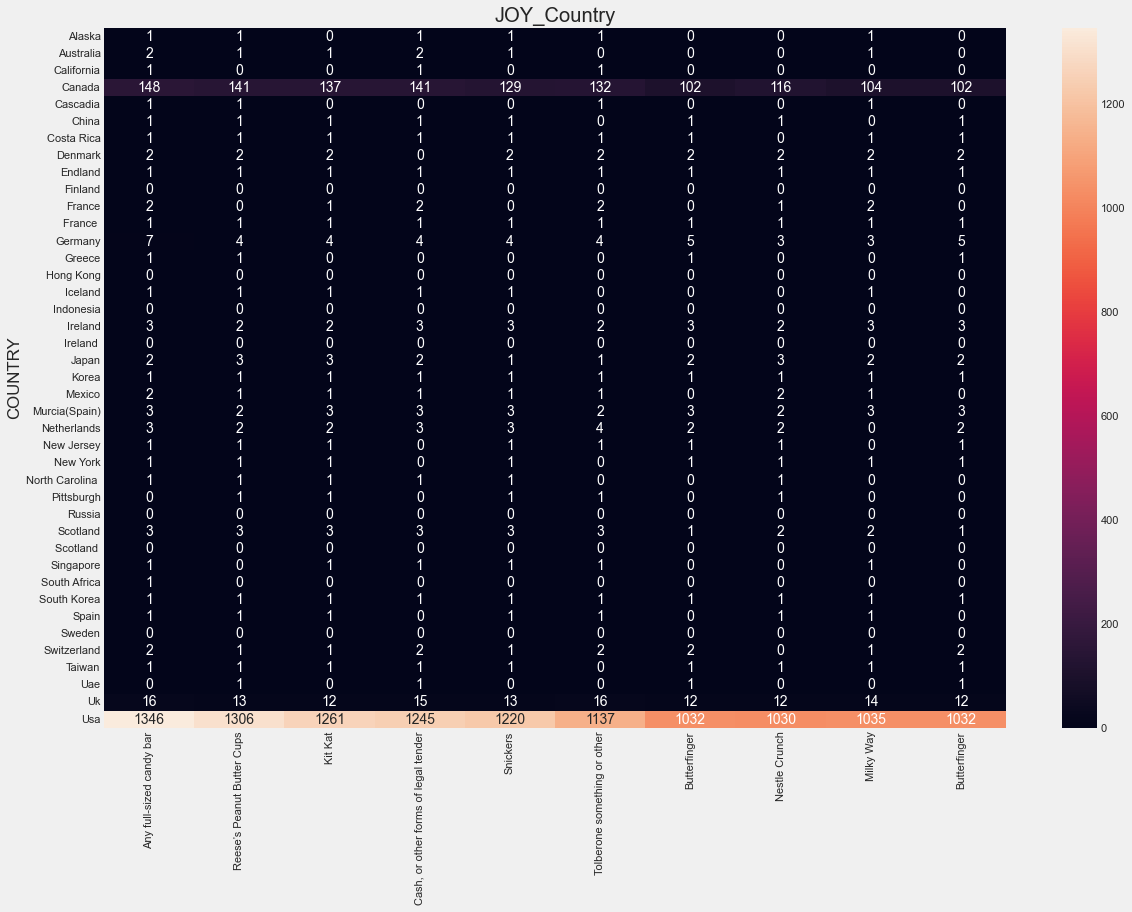

In [111]:
plt.figure(figsize = (18, 12))
sns.heatmap(Result_1,           
           annot=True,           
           fmt='d',                
           cbar=True,               
                    )
plt.title("JOY_Country")

In [112]:
plt.figure(figsize = (18, 12))
co=DESPAIR.groupby("Country")
a_=co["Q6 | Real Housewives of Orange County Season 9 Blue-Ray"].apply(lambda x:x.str.contains("DESPAIR").sum())
b_=co["Q6 | Gum from baseball cards"].apply(lambda x:x.str.contains("DESPAIR").sum())
c_=co["Q6 | White Bread"].apply(lambda x:x.str.contains("DESPAIR").sum())
d_=co["Q6 | Kale smoothie"].apply(lambda x:x.str.contains("DESPAIR").sum())
e_=co["Q6 | Dental paraphenalia"].apply(lambda x:x.str.contains("DESPAIR").sum())
f_=co["Q6 | Creepy Religious comics/Chick Tracts"].apply(lambda x:x.str.contains("DESPAIR").sum())
g_=co["Q6 | Candy that is clearly just the stuff given out for free at restaurants"].apply(lambda x:x.str.contains("DESPAIR").sum())
h_=co["Q6 | Whole Wheat anything"].apply(lambda x:x.str.contains("DESPAIR").sum())
i_=co["Q6 | Those odd marshmallow circus peanut things"].apply(lambda x:x.str.contains("DESPAIR").sum())
g_=co["Q6 | Box'o'Raisins"].apply(lambda x:x.str.contains("DESPAIR").sum())
frames_ = [a_,b_,c_,d_,e_,f_,g_,h_,i_,g_]
result_ = pd.concat(frames_,axis=1)
result_
Result_=result_.rename(columns={"Q6 | Real Housewives of Orange County Season 9 Blue-Ray":"Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards":"Gum from baseball cards","Q6 | White Bread":"White Bread","Q6 | Kale smoothie":"Kale smoothie","Q6 | Dental paraphenalia":"Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts":"Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants":"Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything":"Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things":"Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins":"Q6 | Box'o'Raisins"})

<Figure size 1296x864 with 0 Axes>

Text(0.5, 1.0, 'DESPAIR_Country')

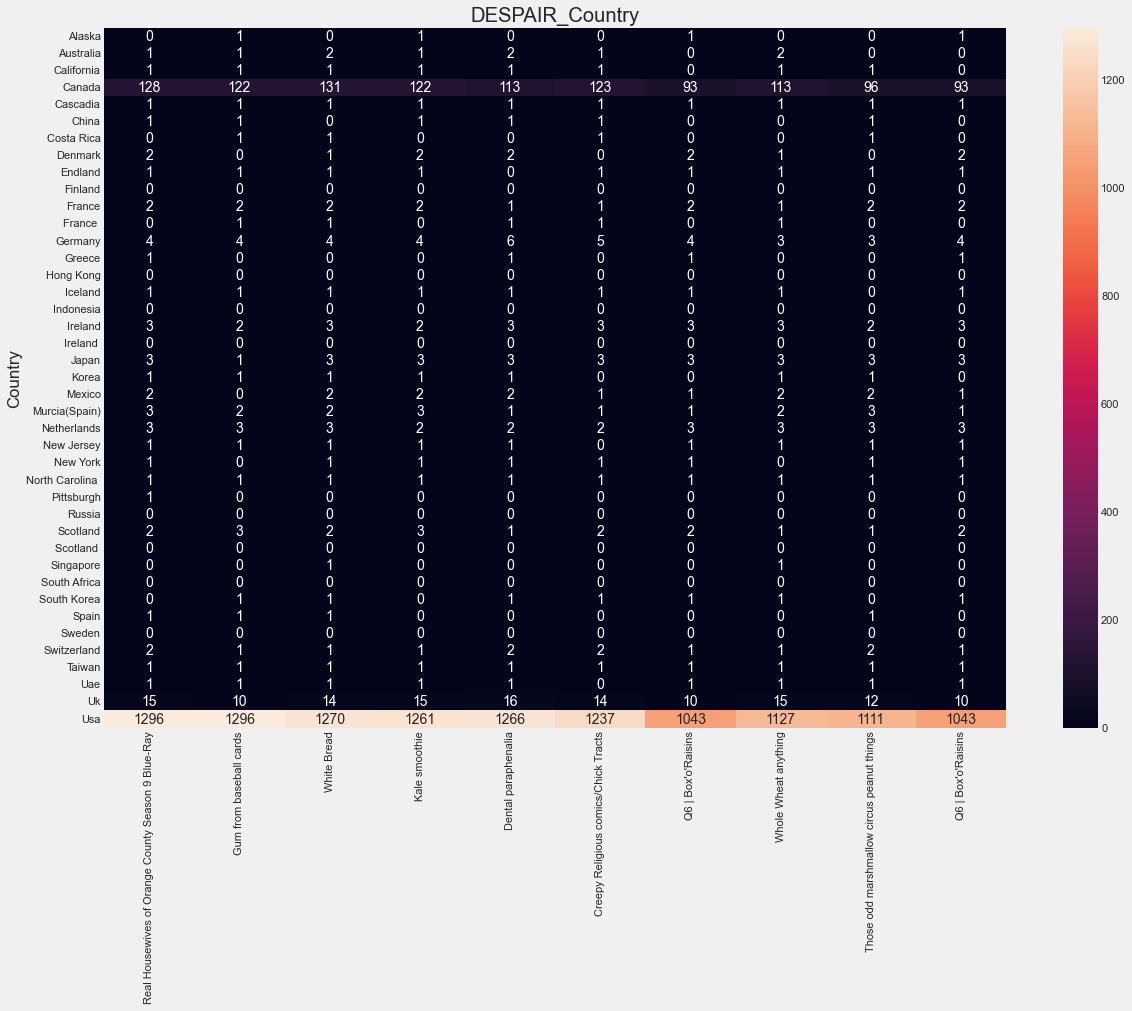

In [113]:
plt.figure(figsize = (18, 12))
sns.heatmap(Result_,           
           annot=True,           
           fmt='d',                
           cbar=True,               
                    )
plt.title("DESPAIR_Country")

In [114]:
main=JOY.groupby("COUNTRY")
secmain=main.get_group("Usa")
Final=secmain[["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain=pd.DataFrame(Final)
seccmain.rename(columns={0:"Usa"},index={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})

,Usa
Any full-sized candy bar,1346
Reese’s Peanut Butter Cups,1306
Kit Kat,1261
"Cash, or other forms of legal tender",1245
Snickers,1220
Tolberone something or other,1137
Peanut M&M’s,1125
Nestle Crunch,1030
Milky Way,1035
Butterfinger,1032


Text(0.5, 1.0, 'JOY_Usa')

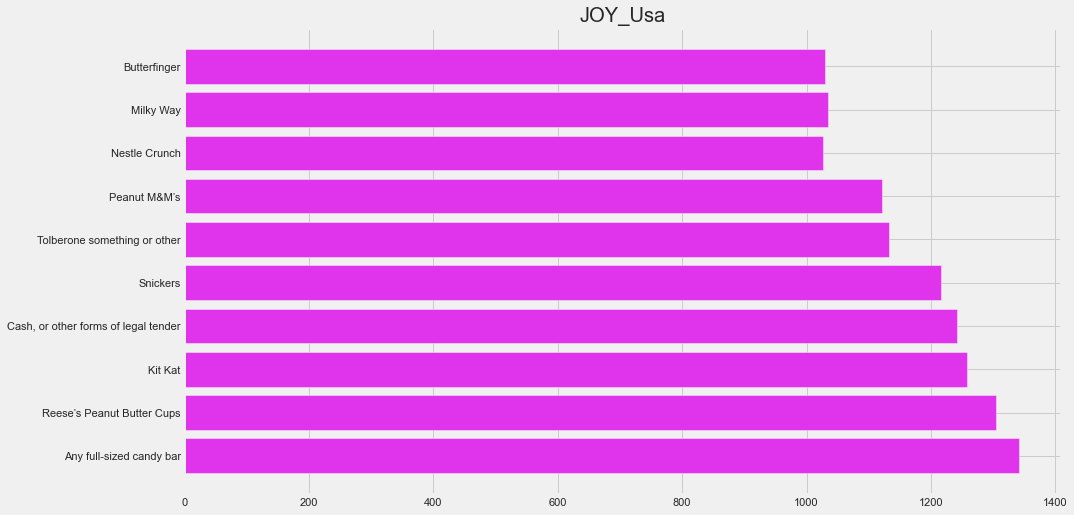

In [117]:
plt.figure(figsize = (14, 8))
y=["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
x=[1342,1304,1258,1241,1216,1133,1122,1026,1034,1029]
plt.barh(y,x,color="#df34eb")
plt.title("JOY_Usa")

Text(0.5, 1.0, 'JOY_Canada')

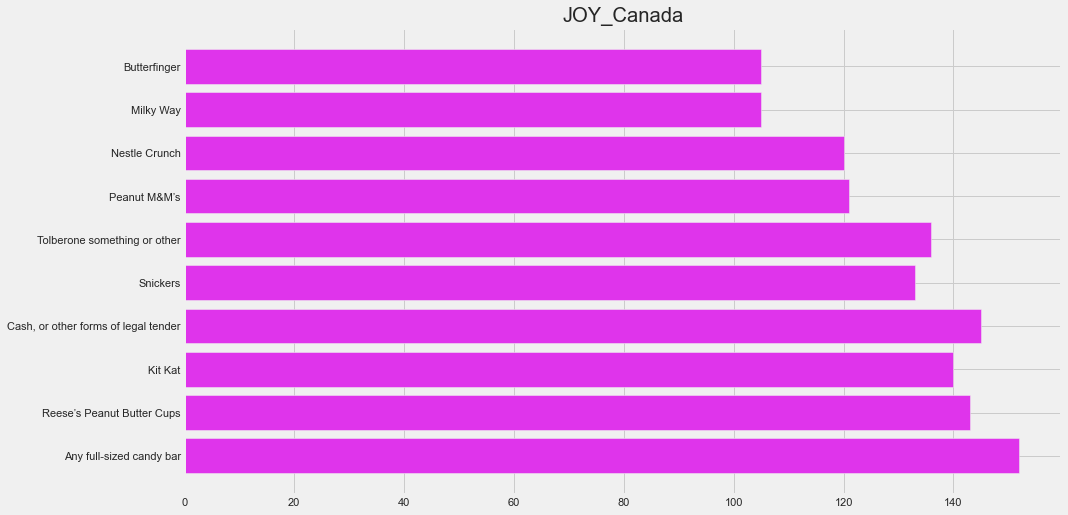

In [118]:
plt.figure(figsize = (14, 8))
y=["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
x=[152,143,140,145,133,136,121,120,105,105]
plt.barh(y,x,color="#df34eb")
plt.title("JOY_Canada")

In [119]:
main=DESPAIR.groupby("Country")
secmain=main.get_group("Usa")
Final=secmain[["Q6 | Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards","Q6 | White Bread","Q6 | Kale smoothie","Q6 | Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain=pd.DataFrame(Final)
seccmain.rename(columns={0:"Usa"},index={"Q6 | Real Housewives of Orange County Season 9 Blue-Ray":"Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards":"Gum from baseball cards","Q6 | White Bread":"White Bread","Q6 | Kale smoothie":"Kale smoothie","Q6 | Dental paraphenalia":"Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts":"Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants":"Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything":"Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things":"Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins":"Q6 | Box'o'Raisins"})

,Usa
Real Housewives of Orange County Season 9 Blue-Ray,80
Gum from baseball cards,37
White Bread,34
Kale smoothie,90
Dental paraphenalia,71
Creepy Religious comics/Chick Tracts,207
Candy that is clearly just the stuff given out for free at restaurants,30
Whole Wheat anything,104
Those odd marshmallow circus peanut things,162
Q6 | Box'o'Raisins,90


In [120]:
main=DESPAIR.groupby("Country")
secmain=main.get_group("Canada")
Final=secmain[["Q6 | Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards","Q6 | White Bread","Q6 | Kale smoothie","Q6 | Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain=pd.DataFrame(Final)
seccmain.rename(columns={0:"Canada"},index={"Q6 | Real Housewives of Orange County Season 9 Blue-Ray":"Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards":"Gum from baseball cards","Q6 | White Bread":"White Bread","Q6 | Kale smoothie":"Kale smoothie","Q6 | Dental paraphenalia":"Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts":"Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants":"Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything":"Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things":"Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins":"Q6 | Box'o'Raisins"})

,Canada
Real Housewives of Orange County Season 9 Blue-Ray,9
Gum from baseball cards,3
White Bread,6
Kale smoothie,11
Dental paraphenalia,13
Creepy Religious comics/Chick Tracts,25
Candy that is clearly just the stuff given out for free at restaurants,6
Whole Wheat anything,10
Those odd marshmallow circus peanut things,20
Q6 | Box'o'Raisins,14


Text(0.5, 1.0, 'DESPAIR_Usa')

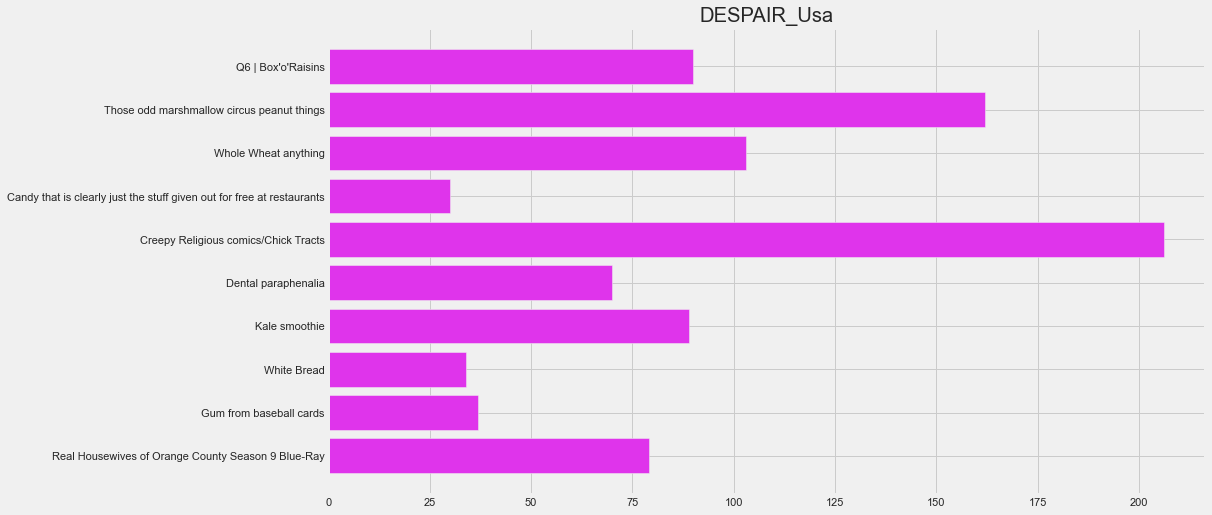

In [121]:
plt.figure(figsize = (14, 8))
y=["Real Housewives of Orange County Season 9 Blue-Ray","Gum from baseball cards","White Bread","Kale smoothie","Dental paraphenalia","Creepy Religious comics/Chick Tracts","Candy that is clearly just the stuff given out for free at restaurants","Whole Wheat anything","Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
x=[79,37,34,89,70,206,30,103,162,90]
plt.barh(y,x,color="#df34eb")
plt.title("DESPAIR_Usa")

Text(0.5, 1.0, 'DESPAIR_Canada')

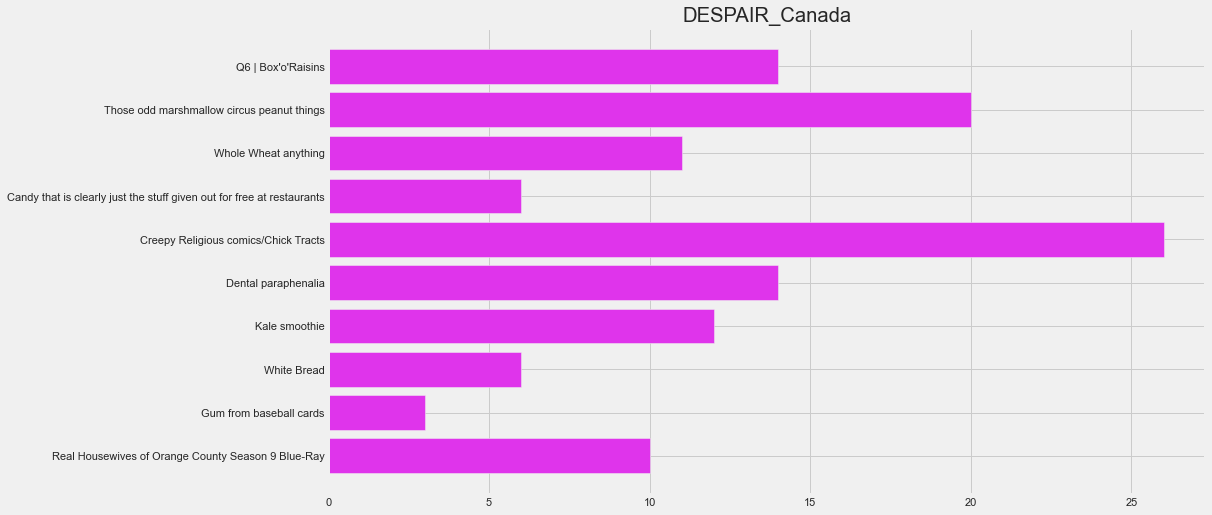

In [122]:
plt.figure(figsize = (14, 8))
y=["Real Housewives of Orange County Season 9 Blue-Ray","Gum from baseball cards","White Bread","Kale smoothie","Dental paraphenalia","Creepy Religious comics/Chick Tracts","Candy that is clearly just the stuff given out for free at restaurants","Whole Wheat anything","Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins"]
x=[10,3,6,12,14,26,6,11,20,14]
plt.barh(y,x,color="#df34eb")
plt.title("DESPAIR_Canada")

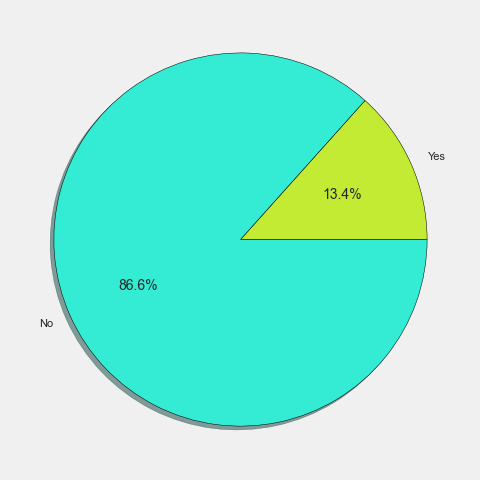

In [123]:
plt.figure(figsize = (18,8))
plt.style.use("seaborn-white")
value=[329,2131]
labels=["Yes","No"]
plt.pie(value, labels=labels,colors=["#c3eb34","#34ebd3"] ,wedgeprops={'edgecolor':'black'}, 
        shadow=True, autopct='%1.1f%%') 
plt.show()


In [124]:
main=JOY.groupby("Going Out")
secmain=main.get_group("Yes")
Final=secmain[["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain_=pd.DataFrame(Final)
seccmain_.rename(columns={0:"Yes"},index={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})


,Yes
Any full-sized candy bar,217
Reese’s Peanut Butter Cups,212
Kit Kat,205
"Cash, or other forms of legal tender",205
Snickers,201
Tolberone something or other,189
Peanut M&M’s,190
Nestle Crunch,174
Milky Way,162
Butterfinger,158


In [125]:
main=JOY.groupby("Going Out")
secmain=main.get_group("No")
Final=secmain[["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
seccmain_=pd.DataFrame(Final)
seccmain_.rename(columns={0:"No"},index={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'})

,No
Any full-sized candy bar,1342
Reese’s Peanut Butter Cups,1286
Kit Kat,1242
"Cash, or other forms of legal tender",1234
Snickers,1198
Tolberone something or other,1131
Peanut M&M’s,1101
Nestle Crunch,1014
Milky Way,1023
Butterfinger,1019


Text(0.5, 1.0, 'Going Out_No')

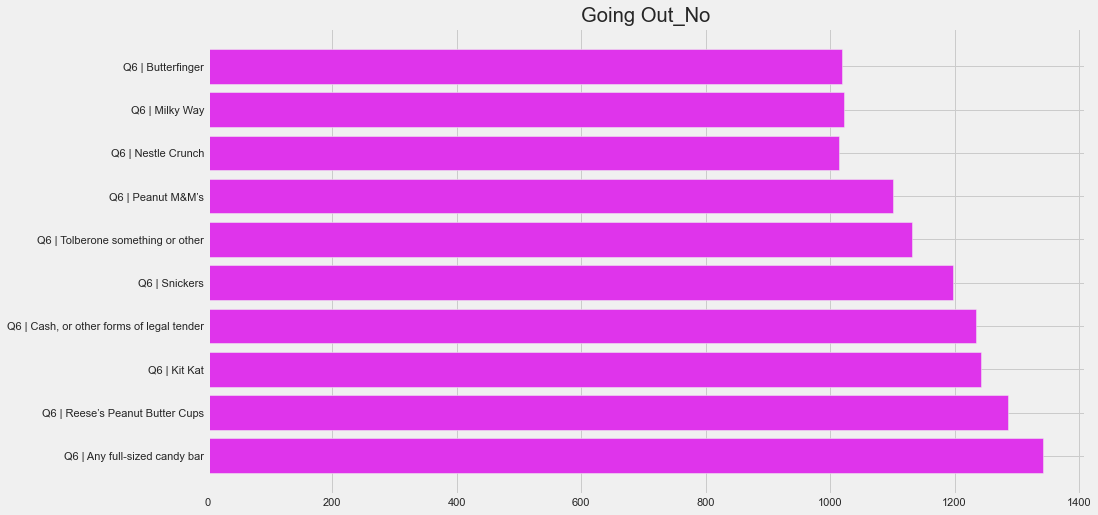

In [126]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14, 8))
y=["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]
x=[1342,1286,1242,1234,1198,1131,1101,1014,1023,1019]
plt.barh(y,x,color="#df34eb")
plt.title("Going Out_No")

Text(0.5, 1.0, 'Going Out_Yes')

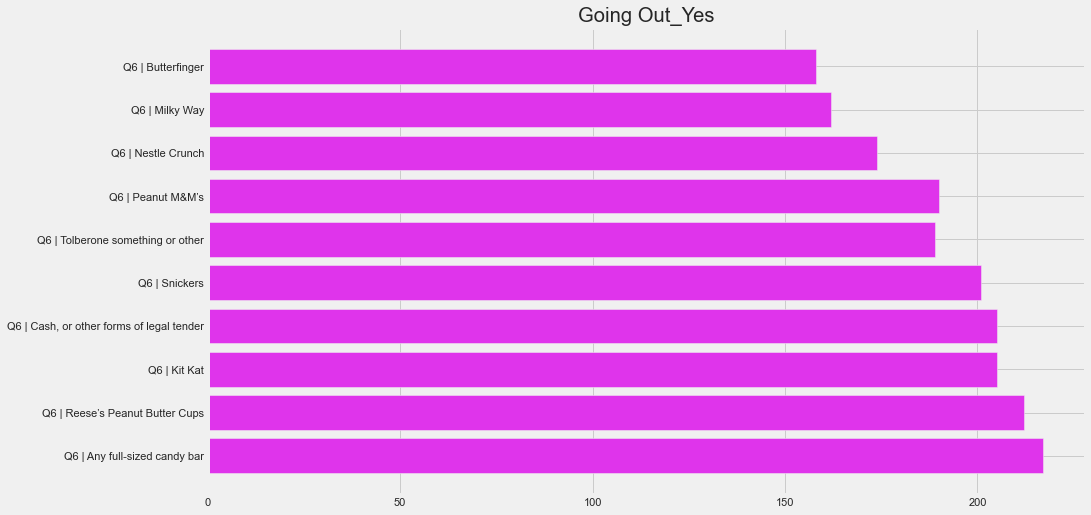

In [127]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (14, 8))
y=["Q6 | Any full-sized candy bar","Q6 | Reese’s Peanut Butter Cups","Q6 | Kit Kat","Q6 | Cash, or other forms of legal tender","Q6 | Snickers","Q6 | Tolberone something or other","Q6 | Peanut M&M’s","Q6 | Nestle Crunch","Q6 | Milky Way","Q6 | Butterfinger"]
x=[217,212,205,205,201,189,190,174,162,158]
plt.barh(y,x,color="#df34eb")
plt.title("Going Out_Yes")

<AxesSubplot:xlabel='Q6 | Cash, or other forms of legal tender', ylabel='Count'>

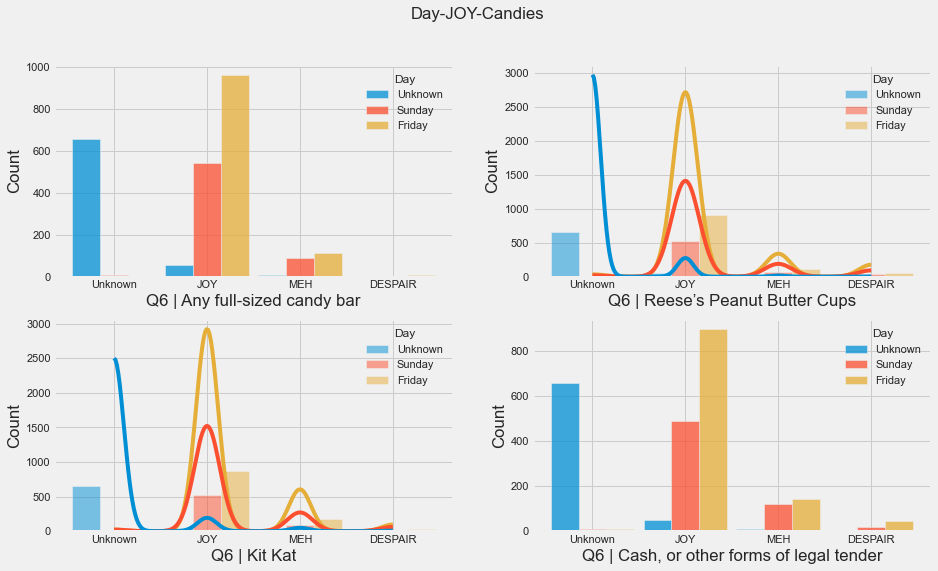

In [128]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Day-JOY-Candies')
sns.histplot(data=JOY, x="Q6 | Any full-sized candy bar", color="skyblue",hue="Day", multiple="dodge", shrink=.9, ax=axs[0, 0])
sns.histplot(data=JOY, x="Q6 | Reese’s Peanut Butter Cups", kde=True, color="olive",hue="Day", multiple="dodge", shrink=.9, ax=axs[0, 1])
sns.histplot(data=JOY, x="Q6 | Kit Kat", kde=True, color="gold",hue="Day", multiple="dodge", shrink=.9, ax=axs[1, 0])
sns.histplot(data=JOY, x="Q6 | Cash, or other forms of legal tender", color="teal",hue="Day", multiple="dodge", shrink=.9, ax=axs[1, 1])

<AxesSubplot:xlabel='Q6 | Nestle Crunch', ylabel='Count'>

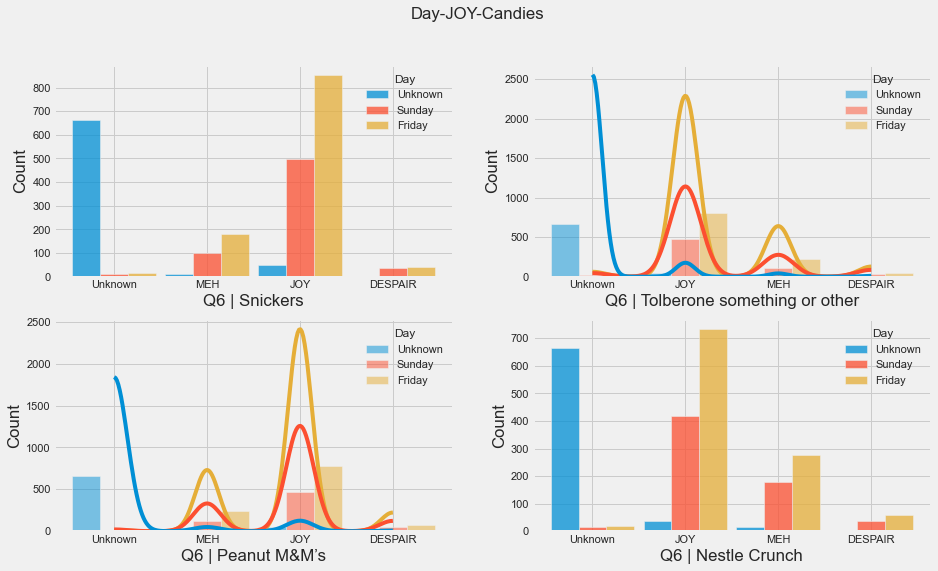

In [131]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Day-JOY-Candies')
sns.histplot(data=JOY, x="Q6 | Snickers", color="skyblue",hue="Day", multiple="dodge", shrink=.9, ax=axs[0, 0])
sns.histplot(data=JOY, x="Q6 | Tolberone something or other", kde=True, color="olive",hue="Day", multiple="dodge", shrink=.9, ax=axs[0, 1])
sns.histplot(data=JOY, x="Q6 | Peanut M&M’s", kde=True, color="gold",hue="Day", multiple="dodge", shrink=.9, ax=axs[1, 0])
sns.histplot(data=JOY, x="Q6 | Nestle Crunch", color="teal",hue="Day", multiple="dodge", shrink=.9, ax=axs[1, 1])

<AxesSubplot:xlabel='Butterfinger', ylabel='Count'>

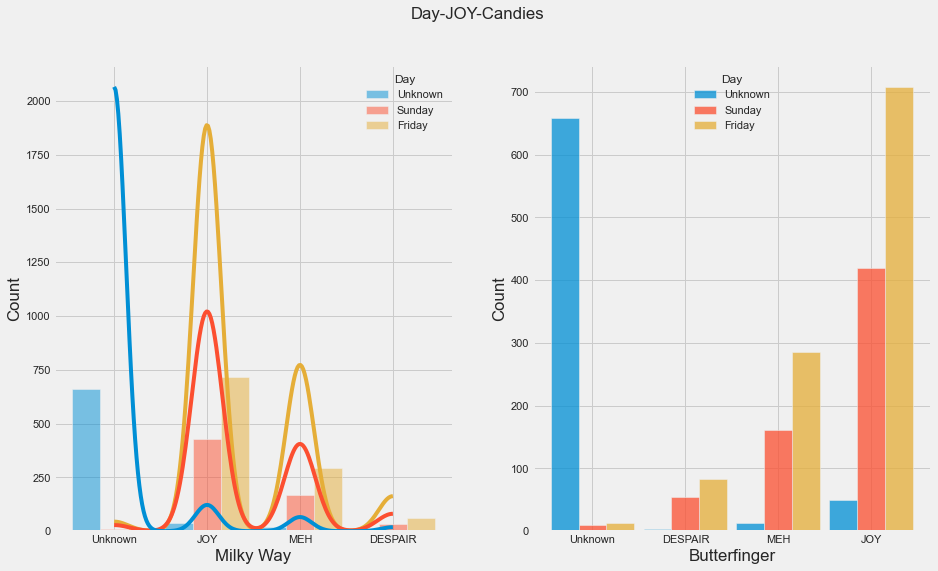

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))
fig.suptitle('Day-JOY-Candies')
sns.histplot(data=JOY, x="Milky Way", kde=True, color="gold",hue="Day", multiple="dodge", shrink=.9,ax=axs[0])
sns.histplot(data=JOY, x="Butterfinger", color="teal",hue="Day", multiple="dodge", shrink=.9, ax=axs[1])

In [146]:
DESPAIR.rename(columns={"Q6 | Real Housewives of Orange County Season 9 Blue-Ray":"Real Housewives of Orange County Season 9 Blue-Ray","Q6 | Gum from baseball cards":"Gum from baseball cards","Q6 | White Bread":"White Bread","Q6 | Kale smoothie":"Kale smoothie","Q6 | Dental paraphenalia":"Dental paraphenalia","Q6 | Creepy Religious comics/Chick Tracts":"Creepy Religious comics/Chick Tracts","Q6 | Candy that is clearly just the stuff given out for free at restaurants":"Candy that is clearly just the stuff given out for free at restaurants","Q6 | Whole Wheat anything":"Whole Wheat anything","Q6 | Those odd marshmallow circus peanut things":"Those odd marshmallow circus peanut things","Q6 | Box'o'Raisins":"Box'o'Raisins"},inplace=True)
JOY.rename(columns={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'},inplace=True)
'''
JOY.rename(columns={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'},inplace=True)
main=JOY.groupby(["Gender","COUNTRY","Day"])
secmain=main.get_group(("Male","Usa","Friday"))
Final_=secmain[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Finalg=pd.DataFrame(Final_)
Finalg.rename(columns={0:"Male_Usa_Friday"})
Finalg
'''
'''
mainf=JOY.groupby(["Gender","COUNTRY","Day"])
secmainf=mainf.get_group(("Male","Canada","Friday"))
Finalf=secmainf[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Finalf=pd.DataFrame(Finalf)
Finalf.rename(columns={0:"Male_Canada_Friday"})

main2=JOY.groupby(["Gender","COUNTRY","Day"])
secmain2=main2.get_group(("Male","Usa","Sunday"))
Final2=secmain2[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Final2=pd.DataFrame(Final2)
Final2
Final2.rename(columns={0:"Male_Usa_Sunday"})
'''
'''
main2_=JOY.groupby(["Gender","COUNTRY","Day"])
secmain2_=main2_.get_group(("Male","Canada","Sunday"))
Final2_=secmain2_[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Final2_=pd.DataFrame(Final2_)
Final2_
Final2_.rename(columns={0:"Male_Canada_Sunday"})
'''

,Male_Canada_Sunday
Any full-sized candy bar,26
Reese’s Peanut Butter Cups,26
Kit Kat,25
"Cash, or other forms of legal tender",25
Snickers,24
Tolberone something or other,22
Peanut M&M’s,21
Nestle Crunch,20
Milky Way,19
Butterfinger,21


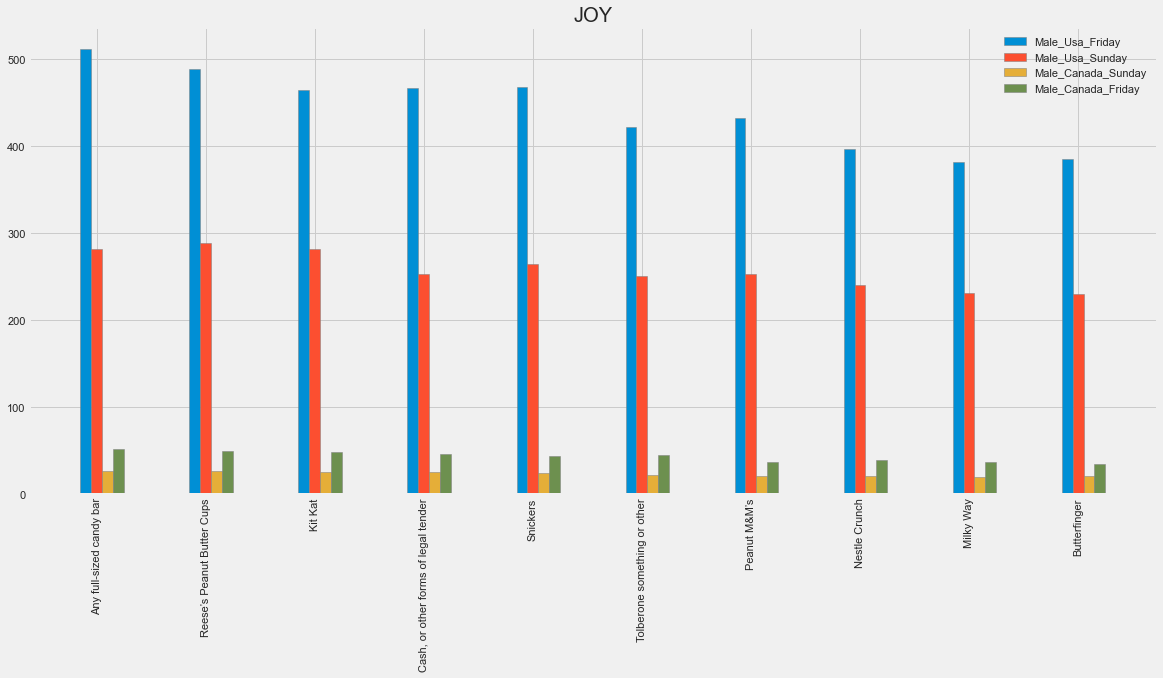

In [149]:
plt.figure(figsize = (18, 8))
width=0.1
x = ["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
xindex=np.arange(len(x))
Male_Usa_Friday=[511,488,464,467,468,422,432,396,382,385]
Male_Usa_Sunday=[282,288,282,253,264,250,253,240,231,230]
Male_Canada_Sunday=[26,26,25,25,24,22,21,20,19,21]
Male_Canada_Friday=[51,49,48,46,44,45,36,39,36,34]
plt.bar(xindex-width,Male_Usa_Friday,width=width, edgecolor ='grey',label="Male_Usa_Friday")
plt.bar(xindex,Male_Usa_Sunday,width=width, edgecolor ='grey',label="Male_Usa_Sunday")
plt.bar(xindex+width,Male_Canada_Sunday,width=width, edgecolor ='grey',label="Male_Canada_Sunday")
plt.bar(xindex+width+width,Male_Canada_Friday,width=width, edgecolor ='grey',label="Male_Canada_Friday")
x = ["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]
plt.xticks(ticks=xindex, labels=x, rotation = 'vertical')    
plt.legend()
plt.title("JOY")
plt.show()

In [153]:
'''
JOY.rename(columns={'Q6 | Any full-sized candy bar': 'Any full-sized candy bar','Q6 | Reese’s Peanut Butter Cups':'Reese’s Peanut Butter Cups','Q6 | Kit Kat':'Kit Kat','Q6 | Cash, or other forms of legal tender':'Cash, or other forms of legal tender','Q6 | Snickers':'Snickers','Q6 | Tolberone something or other':'Tolberone something or other','Q6 | Peanut M&M’s':'Peanut M&M’s','Q6 | Nestle Crunch':'Nestle Crunch','Q6 | Milky Way':'Milky Way','Q6 | Butterfinger':'Butterfinger'},inplace=True)
mainm=JOY.groupby(["Gender","COUNTRY","Day"])
secmainm=mainm.get_group(("Female","Usa","Friday"))
Final_m=secmainm[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Finalgm=pd.DataFrame(Final_m)
Finalgm.rename(columns={0:"Female_Usa_Friday"})
Finalgm


mainf=JOY.groupby(["Gender","COUNTRY","Day"])
secmainf=mainf.get_group(("Male","Canada","Friday"))
Finalf=secmainf[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Finalf=pd.DataFrame(Finalf)
Finalf.rename(columns={0:"Male_Canada_Friday"})

main2=JOY.groupby(["Gender","COUNTRY","Day"])
secmain2=main2.get_group(("Male","Usa","Sunday"))
Final2=secmain2[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Final2=pd.DataFrame(Final2)
Final2
Final2.rename(columns={0:"Male_Usa_Sunday"})

main2_=JOY.groupby(["Gender","COUNTRY","Day"])
secmain2_=main2_.get_group(("Male","Canada","Sunday"))
Final2_=secmain2_[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())
Final2_=pd.DataFrame(Final2_)
Final2_
Final2_.rename(columns={0:"Male_Canada_Sunday"})
'''

'\nJOY.rename(columns={\'Q6 | Any full-sized candy bar\': \'Any full-sized candy bar\',\'Q6 | Reese’s Peanut Butter Cups\':\'Reese’s Peanut Butter Cups\',\'Q6 | Kit Kat\':\'Kit Kat\',\'Q6 | Cash, or other forms of legal tender\':\'Cash, or other forms of legal tender\',\'Q6 | Snickers\':\'Snickers\',\'Q6 | Tolberone something or other\':\'Tolberone something or other\',\'Q6 | Peanut M&M’s\':\'Peanut M&M’s\',\'Q6 | Nestle Crunch\':\'Nestle Crunch\',\'Q6 | Milky Way\':\'Milky Way\',\'Q6 | Butterfinger\':\'Butterfinger\'},inplace=True)\nmainm=JOY.groupby(["Gender","COUNTRY","Day"])\nsecmainm=mainm.get_group(("Female","Usa","Friday"))\nFinal_m=secmainm[["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way","Butterfinger"]].apply(lambda x:x.str.contains("JOY").sum())\nFinalgm=pd.DataFrame(Final_m)\nFinalgm.rename(columns={0:"Female_Usa_Friday"})\nFinalgm\n\

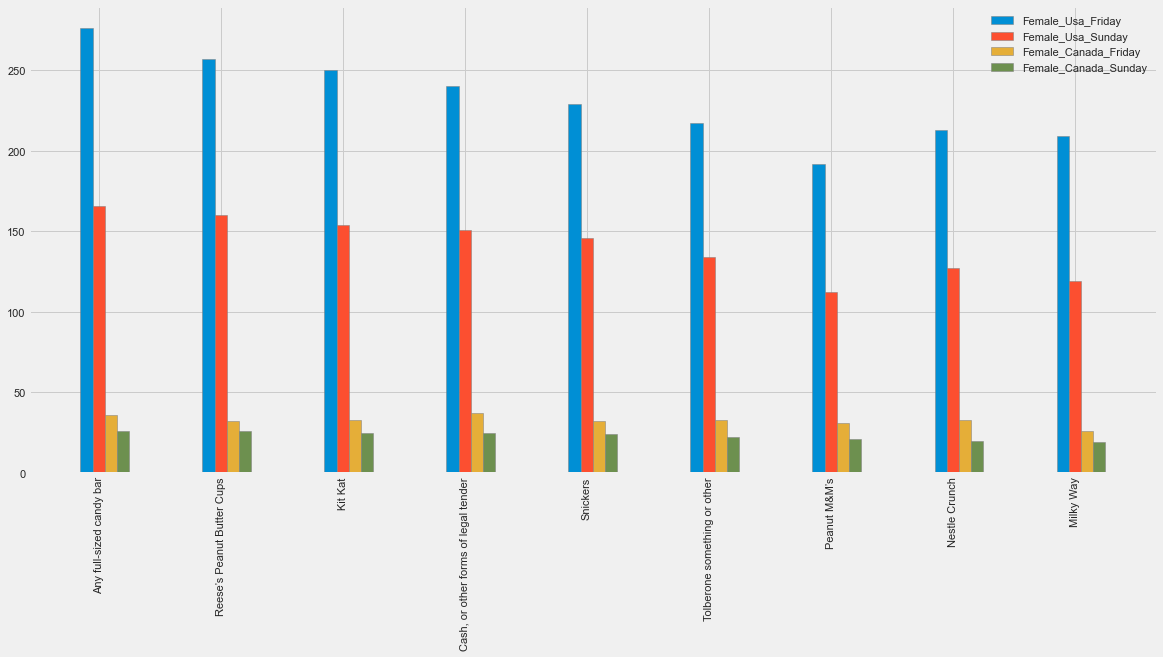

In [154]:
plt.figure(figsize = (18, 8))
width=0.1
x = ["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way"]
xindex=np.arange(len(x))
Female_Usa_Friday=[276,257,250,240,229,217,192,213,209]
Female_Usa_Sunday=[166,160,154,151,146,134,112,127,119]
Female_Canada_Friday=[36,32,33,37,32,33,31,33,26]
Female_Canada_Sunday=[26,26,25,25,24,22,21,20,19]
plt.bar(xindex-width,Female_Usa_Friday,width=width, edgecolor ='grey',label="Female_Usa_Friday")
plt.bar(xindex,Female_Usa_Sunday,width=width, edgecolor ='grey',label="Female_Usa_Sunday")
plt.bar(xindex+width,Female_Canada_Friday,width=width, edgecolor ='grey',label="Female_Canada_Friday")
plt.bar(xindex+width+width,Female_Canada_Sunday,width=width, edgecolor ='grey',label="Female_Canada_Sunday")
x = ["Any full-sized candy bar","Reese’s Peanut Butter Cups","Kit Kat","Cash, or other forms of legal tender","Snickers","Tolberone something or other","Peanut M&M’s","Nestle Crunch","Milky Way"]
plt.xticks(ticks=xindex, labels=x, rotation = 'vertical')    
plt.legend()
plt.show()